# Решение уравнения переноса
## Дифференциальная задача
$$\begin{cases}
    u_t + e^{-x}u_x = \sin(\omega t),\\
    u(x, 0) = exp[-(\frac{x-0.2}{0.01})^2],\\
    u(0, t) = 0.5*\sin(5t).\\
    x \in [0, 1], t \in [0, 1]
\end{cases}$$

## Разностная задача(Явная схема)
Воспользуемся схемой (|_)

$$
\frac{u^{k+1}_n - u^{k}_n}{\tau} + e^{-hn}\frac{u^k_n-u^k_{n-1}}{n} = \sin(\omega k\tau ),
$$

$$
u^0_n = 1-e^{-nh}, n = 1..N
$$

$$
u^k_0 = k\tau, k = 0..K-1
$$

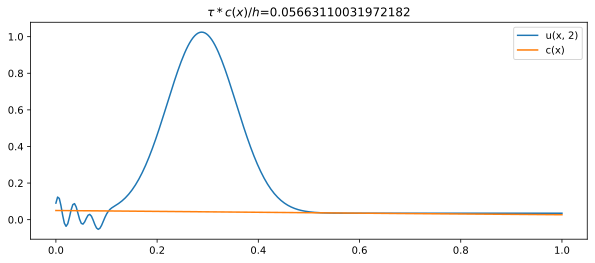

interactive(children=(IntSlider(value=300, description='N', max=500, min=100), IntSlider(value=1250, descripti…

<function __main__.var(N, K, t)>

In [1]:
### Пояснялки в комментариях
from matplotlib import pyplot as plt
### Пишешь не в jupyter - комментируй эту строку
%config InlineBackend.figure_formats = ['svg']
### Эту тоже
from ipywidgets import interact
### Это самая важная в мире библиотека без нее никуда
import numpy as np

# Тут задаем начальное условие
def ux0(x):
    return np.exp(-(x-0.2)**2/0.01)

# Тут задаем краевое условие при x = 0
def u0t(t):
    return 0.1*np.sin(t)
    
# Неоднородная часть
def f(x, t):
    omega = 10
    return np.sin(omega*t)

# Зависимость скорости от координаты
def c(x):
    return 0.1/(1+np.exp(x))

# Тут все решается))
def solve_explicit(N, K, Tmax):
    # Вычисляем наши шаги, по факте они практически не нужны
    tau = Tmax/K; h = 1/N;
    # Тут запишем чего мы ждем - матрицу K*N
    U = np.zeros((K, N))
    # Заданим массив из Х от 0 до 1 из N точек, шаг эта штука считает сама
    X = np.linspace(0, 1, N)
    # Зададим массив из T
    T = np.linspace(0, Tmax, K)
    # Тут учтем кравевые условия
    U[0, :] = ux0(X)
    U[:, 0] = u0t(T)
    # Погнали решать разностную задача для неявлной схемы(в шапке все написано)
    for k in range(0, K-1):
        # Производная по х вычислена сразу для всего временного слоя U[k, 1:] - U[k, :-1] вот этой штукой
        # Очконул, что написано в квадратных скобках? - ботай срезы списков
        U[k+1, 1:] = (f(X[1:], tau*(k)) - c(X[1:])*(U[k, 1:] - U[k, :-1])/h)*tau + U[k, 1:]
        # Вернем все, что нам надо
    return (X, T, U)
# Если не юзаешь юпитер, то просто вызывай эту функцию с разными параметрами и радуйся жизни
# N - частота дискретизации X
# К - частота дискретизации T
# T max - maксимальное время
# t - момент времени, в который хотим нарисовать график
def var(N, K, t):
    X, T, sol_exp = solve_explicit(N, K, Tmax)
    n = int(t*K/Tmax)%K
    plt.figure(figsize=(10, 4))
    # В заголовке написан коэффицент на который написана устойчивость
    plt.title(rf"$\tau*c(x)/h$={N*c(0.5)/K}")
    plt.plot(X, sol_exp[n], label=f"u(x, {t})")
    plt.plot(X, c(X), label="c(x)")
    plt.legend()
    plt.show()
    return None
# Зададим максимальное время
Tmax = 10
# Пример использования var
# Var(100, 500, 5.5)

### Не знаешь, что это - комментируй и используй var
var(300, 200, 2)
interact(var, N=(100, 500), K=(500, 2000), t=(0, Tmax, 0.01))

In [4]:
# точное решение однородного уравнения с аналогичными начальными условиями и с=х**2
# Тут задаем начальное условие
def ux0(x):
    return np.exp(-(x-0.2)**2/0.01)#1 - np.exp(-x)

# Тут задаем краевое условие при x = 0
def u0t(t):
    return 0
    
# Неоднородная часть
def f(x, t):
    omega = 10
    return 0#np.sin(omega*t)*x

# Зависимость скорости от координаты
def c(x):
    return x**2#*np.ones(len(x))#np.exp(-x)
    
def u_exact(x, t):
    return np.exp(-1/(0.1)**2*((x-0.2*(1+x*t))/(1+x*t))**2)

def var_tot(t):
    N = 1000
    K = 10000
    X, T, sol = solve_explicit(N, K, Tmax)
    n = int(t*K/Tmax)%K
    plt.figure(figsize=(10, 4))
    # В заголовке написан коэффицент на который написана устойчивость
    plt.title(rf"$\Delta u$ = {np.max(abs(sol[n] - u_exact(X, t)))}")
    plt.plot(X, sol[n], label=r"$u(x, t)$")
    plt.plot(X, u_exact(X, t), label=r"$u_{exact}(x, t)$")
    plt.plot(X, c(X), label="c(x)")
    plt.legend()
    plt.show()
    plt.plot(X, sol[n]-u_exact(X, t))
    plt.show()
    return None
Tmax = 10
interact(var_tot, t=(0, Tmax, 0.01))
# Делаем вывод, что код написан правильно)

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0, step=0.01), Output()), _dom_classes=('…

<function __main__.var_tot(t)>

## Разностная задача (Неявная)
$$
\frac{u^{k+1}_n - u^{k}_n}{\tau} + e^{-hn}\frac{u^{k+1}_n-u^{k+1}_{n-1}}{n} = \sin(\omega k\tau ),
$$

$$
u^0_n = 1-e^{-nh}, n = 1..N
$$

$$
u^k_0 = k\tau, k = 0..K-1
$$

In [3]:
### Пояснялки в комментариях
from matplotlib import pyplot as plt
### Пишешь не в jupyter - комментируй эту строку
%config InlineBackend.figure_formats = ['svg']
### Эту тоже
from ipywidgets import interact
### Это самая важная в мире библиотека без нее никуда
import numpy as np

# Тут задаем начальное условие
def ux0(x):
    return np.exp(-(x-0.2)**2/0.01)

# Тут задаем краевое условие при x = 0
def u0t(t):
    return 0.1*np.sin(t)
    
# Неоднородная часть
def f(x, t):
    omega = 10
    return np.sin(omega*t)

# Зависимость скорости от координаты
def c(x):
    return 0.1/(1+np.exp(x))

def solve():
    pass